# Importing libraries and loading dataset

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
# Display first few rows
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


# Check for missing values

In [4]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

# Imputation

In [5]:
mode_value = data['Satisfaction Level'].mode()[0]
data['Satisfaction Level'].fillna(mode_value, inplace=True)
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [6]:
data.shape

(350, 11)

# Summary 

In [7]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


# EDA

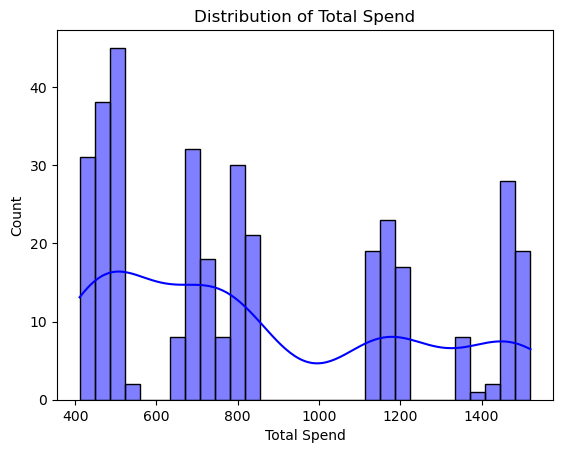

In [12]:
# Visualization of Distribution of Total Spend
sns.histplot(data['Total Spend'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Spend')
plt.show()

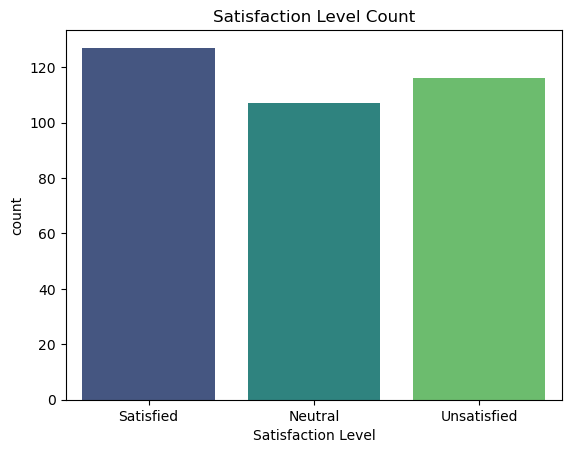

In [13]:
# Visualization of Satisfaction Level Count
sns.countplot(x='Satisfaction Level', data=data, palette='viridis')
plt.title('Satisfaction Level Count')
plt.show()

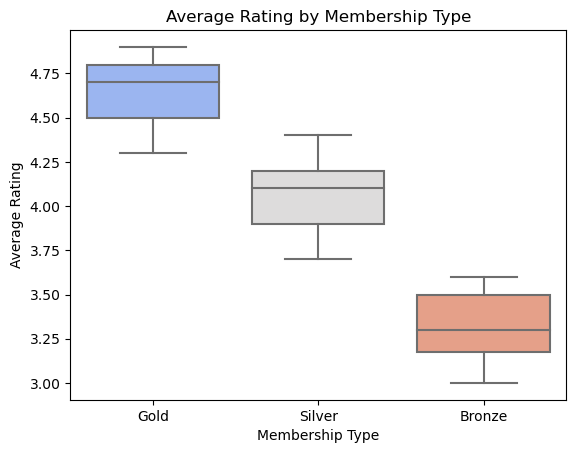

In [14]:
# Visualization of Average Rating vs. Membership Type
sns.boxplot(x='Membership Type', y='Average Rating', data=data, palette='coolwarm')
plt.title('Average Rating by Membership Type')
plt.show()


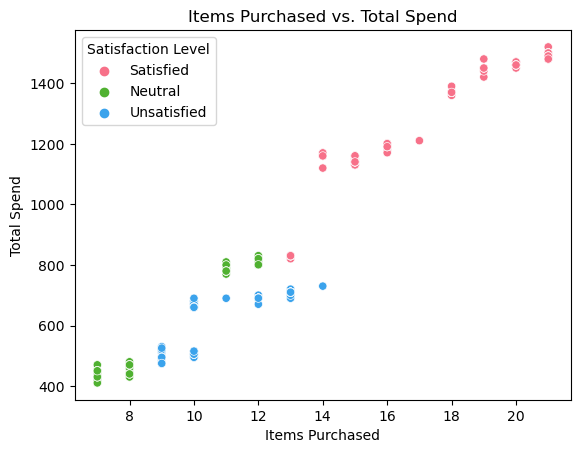

In [15]:
# Visualization of Items Purchased vs. Total Spend
sns.scatterplot(x='Items Purchased', y='Total Spend', hue='Satisfaction Level', data=data, palette='husl')
plt.title('Items Purchased vs. Total Spend')
plt.show()

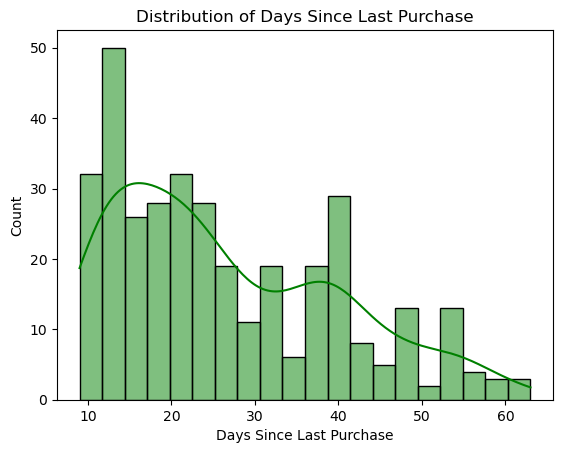

In [16]:
# Visualization of Days Since Last Purchase Distribution
sns.histplot(data['Days Since Last Purchase'], bins=20, kde=True, color='green')
plt.title('Distribution of Days Since Last Purchase')
plt.show()

# Data Preprocessing

In [17]:
# Handle categorical data
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])
le_city = LabelEncoder()
data['City'] = le_city.fit_transform(data['City'])
le_membership = LabelEncoder()
data['Membership Type'] = le_membership.fit_transform(data['Membership Type'])
le_satisfaction = LabelEncoder()
data['Satisfaction Level'] = le_satisfaction.fit_transform(data['Satisfaction Level'])

In [18]:
# Drop unnecessary columns if any
data = data.drop(columns=['Customer ID'])

In [19]:
# Define features (X) and target (y)
X = data.drop(columns=['Satisfaction Level'])
y = data['Satisfaction Level']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [21]:
# Logistic Regression

In [27]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Confusion Matrix for Logistic Regression:
[[23  0  0]
 [ 0 29  0]
 [ 0  0 18]]


In [32]:
# Random Forest Model

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Confusion Matrix for Random Forest:
[[23  0  0]
 [ 0 29  0]
 [ 0  0 18]]


In [33]:
# SVM Model

In [29]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.91      0.43      0.59        23
           1       1.00      0.97      0.98        29
           2       0.58      1.00      0.73        18

    accuracy                           0.80        70
   macro avg       0.83      0.80      0.77        70
weighted avg       0.86      0.80      0.79        70

Confusion Matrix for SVM:
[[10  0 13]
 [ 1 28  0]
 [ 0  0 18]]


In [34]:
# Gradient Boosting Classifier

In [30]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Confusion Matrix for Gradient Boosting:
[[23  0  0]
 [ 0 29  0]
 [ 0  0 18]]


In [35]:
# Model Comparison

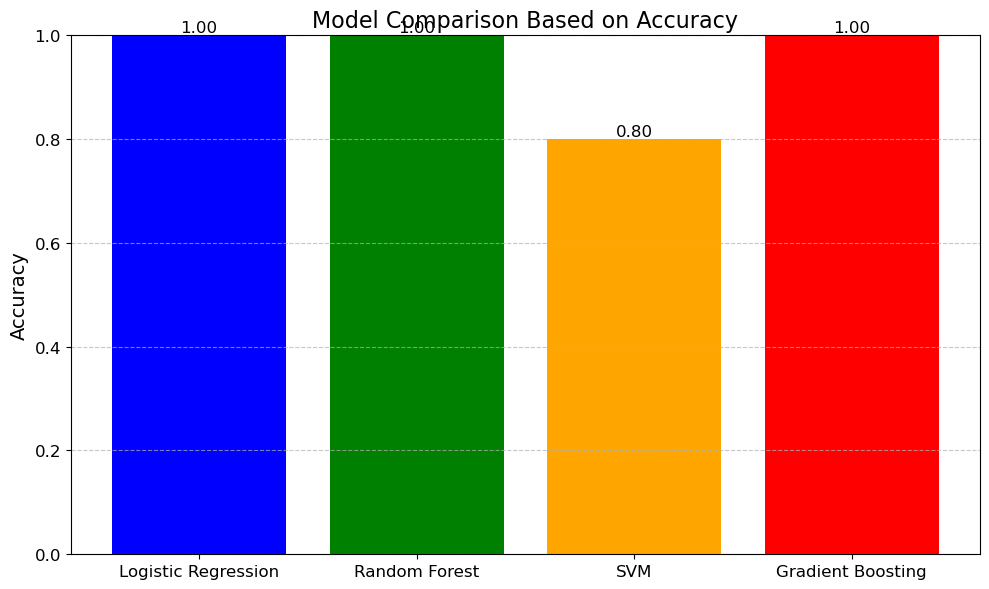

In [31]:
import matplotlib.pyplot as plt
# Collect the accuracy scores
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_gb)
]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])

# Add accuracy scores on top of the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{acc:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('Model Comparison Based on Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()